In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'/content/marketing_AB.csv')

In [3]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [8]:
df.duplicated(subset='user id').sum()

0

In [9]:
df.drop(['Unnamed: 0','user id'],axis=1,inplace=True)

In [11]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [14]:
df_cat=df[['test group','converted','most ads day','most ads hour']]

In [15]:
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [19]:
df_cat

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14
...,...,...,...,...
588096,ad,False,Tuesday,23
588097,ad,False,Tuesday,23
588098,ad,False,Tuesday,23
588099,ad,False,Tuesday,23


In [20]:
for i in df_cat.columns:
  print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


In [21]:
#UNIVARIATE ANALYSIS

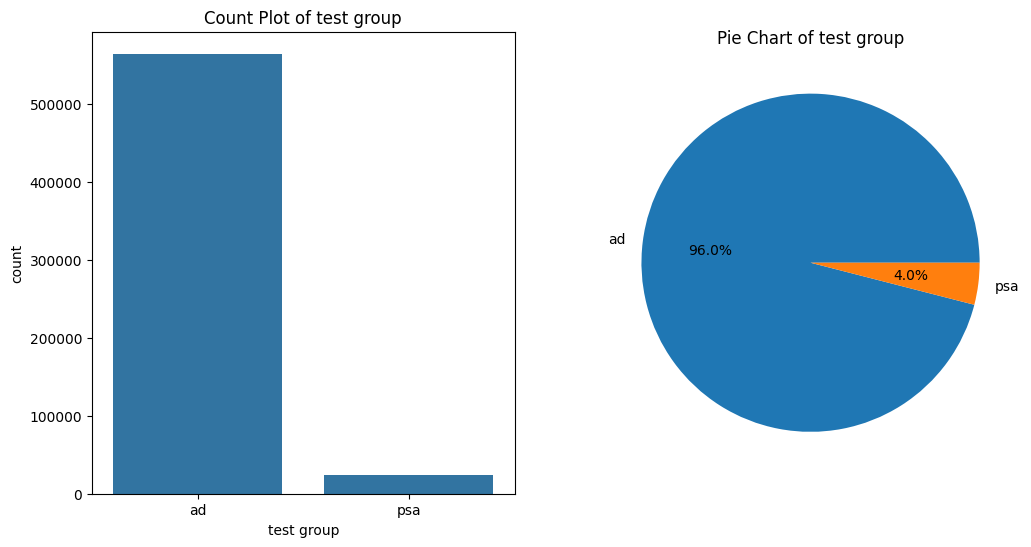

In [24]:
variable='test group'

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'Count Plot of {variable}')

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title(f'Pie Chart of {variable}')
plt.show()



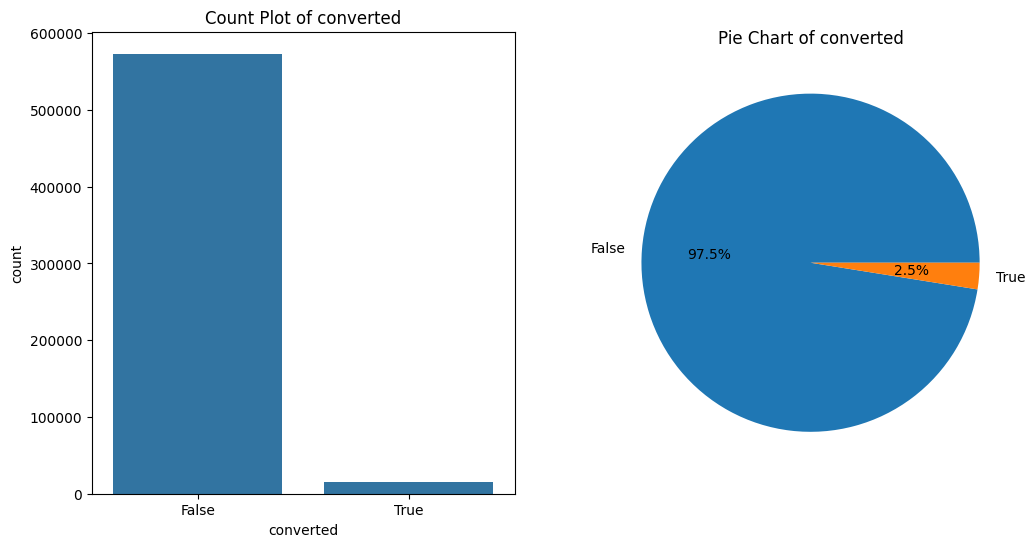

In [25]:
variable='converted'

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'Count Plot of {variable}')

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title(f'Pie Chart of {variable}')
plt.show()



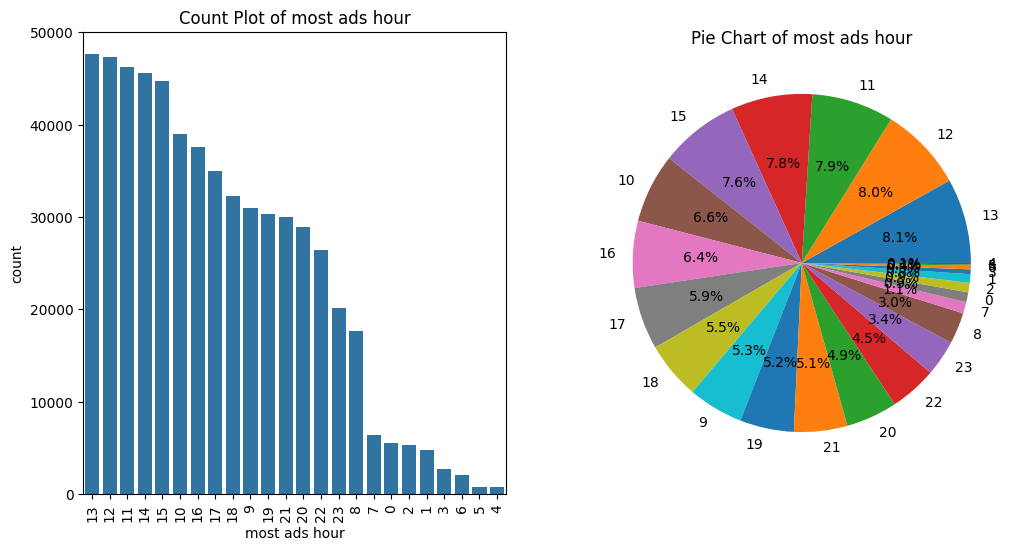

In [29]:
variable='most ads hour'

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot of {variable}')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title(f'Pie Chart of {variable}')
plt.show()



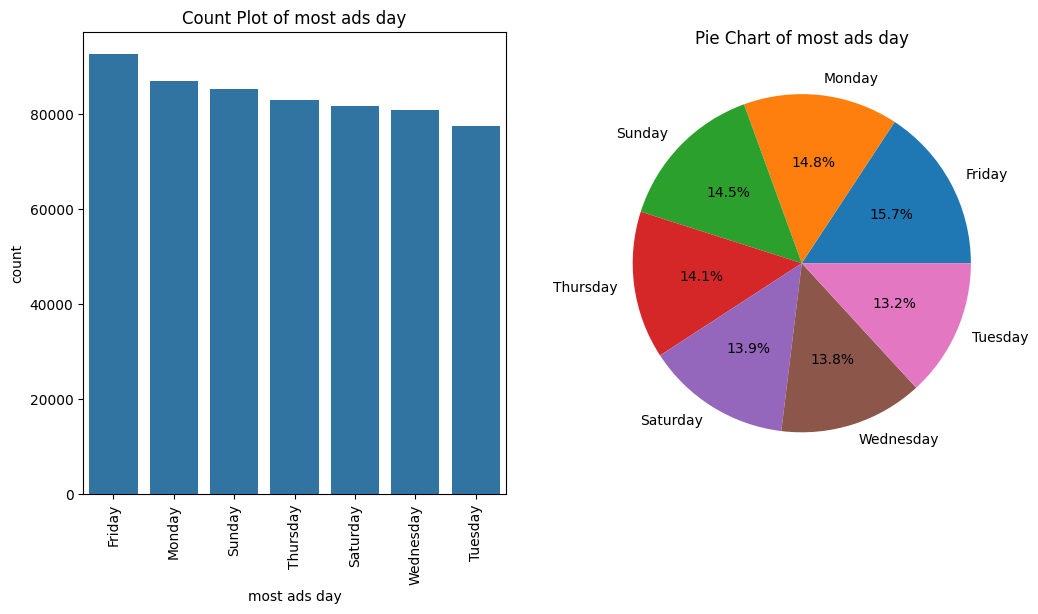

In [32]:
variable='most ads day'

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot of {variable}')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title(f'Pie Chart of {variable}')
plt.show()



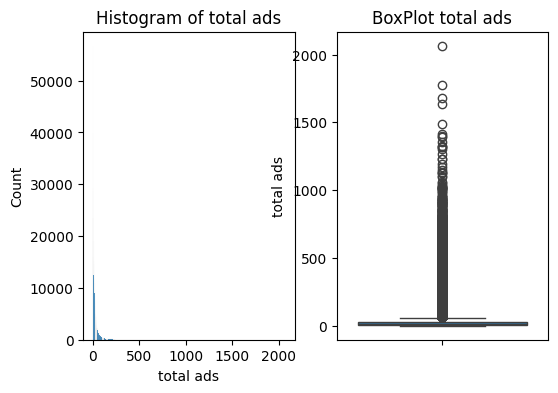

In [33]:
#FOR NUMERICAL VARIABLE
variable='total ads'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df)
plt.title(f'Histogram of {variable}')

plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df)
plt.title(f'BoxPlot {variable}')
plt.show()

In [34]:
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


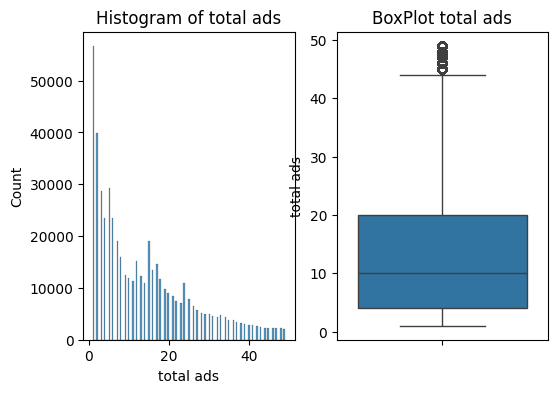

In [37]:
#Since more than 75% of total ads are 27 we can take a slightly larger number and try plotting our graphs
variable='total ads'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df[df['total ads']<50])
plt.title(f'Histogram of {variable}')

plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df[df['total ads']<50])
plt.title(f'BoxPlot {variable}')
plt.show()

In [38]:
#BIVARIATE ANALYSIS- Pair everything with targeted column "Converted"

In [41]:
ct_conversion_test_group=pd.crosstab(df['test group'],df['converted'],normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

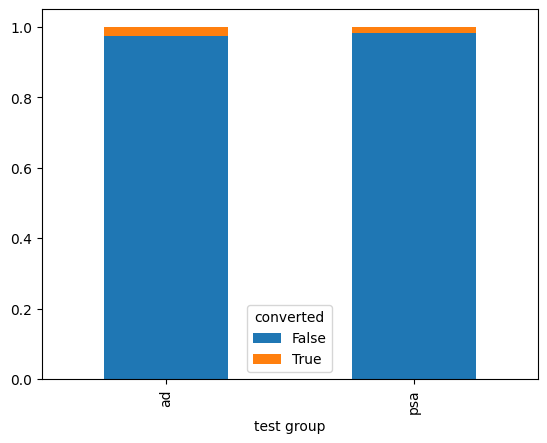

In [43]:
ct_conversion_test_group.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

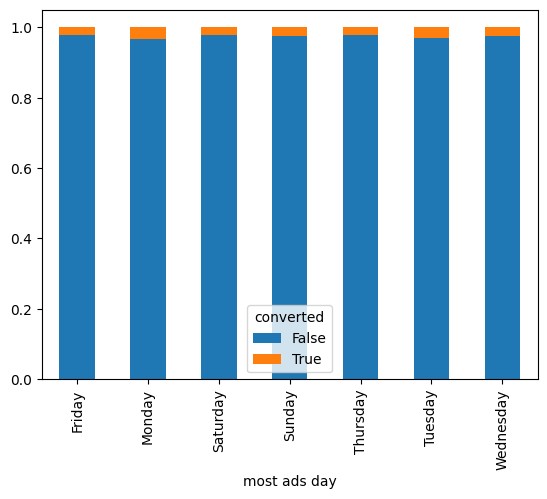

In [46]:
ct_conversion_test_group=pd.crosstab(df['most ads day'],df['converted'],normalize='index')
print(ct_conversion_test_group.sort_values(by=True, ascending=False))
ct_conversion_test_group.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

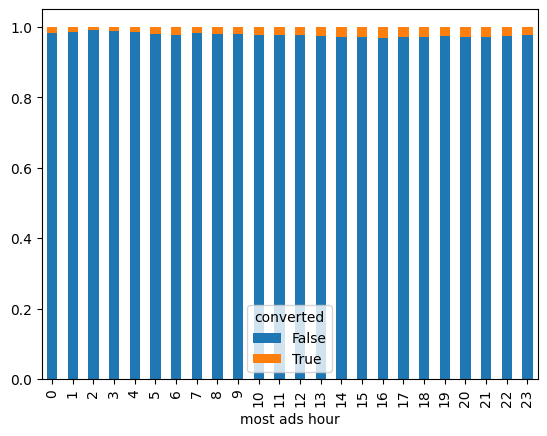

In [48]:
ct_conversion_test_group=pd.crosstab(df['most ads hour'],df['converted'],normalize='index')
print(ct_conversion_test_group.sort_values(by=True, ascending=False))
ct_conversion_test_group.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

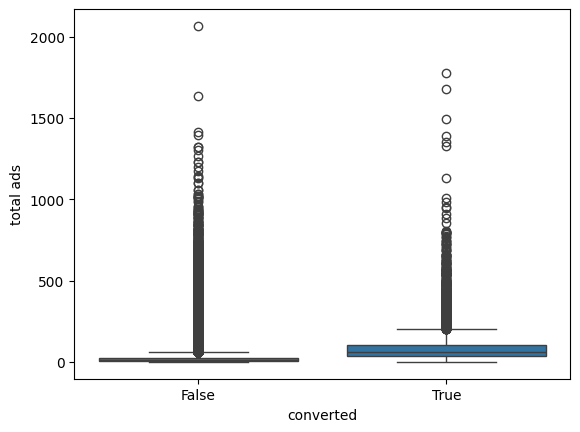

In [49]:
sns.boxplot(x='converted',y='total ads',data=df)

<Axes: xlabel='converted', ylabel='total ads'>

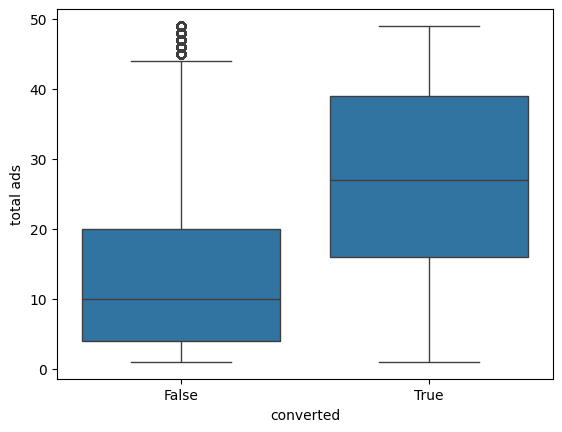

In [52]:
sns.boxplot(x='converted',y='total ads',data=df[df['total ads']<50])

In [53]:
  #STATISTICAL TESTS

In [57]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
alpha=0.05
for variable in df_cat.columns:
  ct=pd.crosstab(df_cat[variable],df_cat['converted'])
  chi2,p,dof,expected=chi2_contingency(ct)

  print(f"\nChi squared test for {variable} vs converted:")
  print(f"Chi squared value :{chi2} ")
  print(f"p-value: {p} ")
  print(f"Degrees of freedom: {dof} ")
  print(f"Expected frequencies: \n{expected} ")

  if p<=alpha:
    print(f"Reject null hypothesis i.e. The difference in conversion rates across {variable}  is statistically significant")
  else:
    print(f"Fail to reject null hypothesis: There is no significant difference in conversion rates across {variable} ")


Chi squared test for test group vs converted:
Chi squared value :54.005823883685245 
p-value: 1.9989623063390075e-13 
Degrees of freedom: 1 
Expected frequencies: 
[[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]] 
Reject null hypothesis i.e. The difference in conversion rates across test group  is statistically significant

Chi squared test for converted vs converted:
Chi squared value :588060.3533722772 
p-value: 0.0 
Degrees of freedom: 1 
Expected frequencies: 
[[5.58789620e+05 1.44683796e+04]
 [1.44683796e+04 3.74620429e+02]] 
Reject null hypothesis i.e. The difference in conversion rates across converted  is statistically significant

Chi squared test for most ads day vs converted:
Chi squared value :410.0478857936585 
p-value: 1.932184379244731e-85 
Degrees of freedom: 6 
Expected frequencies: 
[[90270.67946492  2337.32053508]
 [84875.37656627  2197.62343373]
 [79598.99452645  2061.00547355]
 [83235.82833221  2155.17166779]
 [80887.62875084  2094.37124916]


In [58]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


In [59]:
#Check normality and equality of variances:
shapiro_stat_true,shapiro_p_value_true=shapiro(df[df['converted']==True]['total ads'])
shapiro_stat_false,shapiro_p_value_false=shapiro(df[df['converted']==False]['total ads'])

print(f"Shapiro-Wilk test for normality(true group):p-value= {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality(false group):p-value= {shapiro_p_value_false}")

levene_stat,levene_p_value=levene(df[df['converted']]['total ads'],df[~df['converted']]['total ads'])
print(f"Levene test for equality of variances:p-value= {levene_p_value}")

Shapiro-Wilk test for normality(true group):p-value= 1.638680987007771e-98
Shapiro-Wilk test for normality(false group):p-value= 9.883049430735801e-204
Levene test for equality of variances:p-value= 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


In [60]:
alpha=0.05
if shapiro_p_value_true>alpha and shapiro_p_value_false>alpha and levene_p_value>alpha:
  t_stat,t_p_value=ttest_ind(df[df['converted']]['total ads'],df[~df['converted']]['total ads'])
  print(f"Independent two sample t test: p-value= {t_p_value}")
else:
  u_stat,u_p_value=mannwhitneyu(df[df['converted']]['total ads'],df[~df['converted']]['total ads'])
  print(f"Mann-Whitney U test: p-value= {u_p_value}")

Mann-Whitney U test: p-value= 0.0
